Importing libs

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import expon


Define chi-sqared function for exponential distribution

In [14]:
def chi_squared_test(random_numbers, num_bins, alpha, lam, x_max=10):
    observed_frequencies = np.histogram(random_numbers, bins=num_bins, density=True)[0]
    x = np.linspace(0, x_max, 50)
    expected_frequency = expon.pdf(x, scale=1/lam)
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)
    
    degrees_of_freedom = num_bins - 1
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical

Define paremetrs

In [15]:
lambda_values = [0.5, 1.0, 1.5, 2.0, 2.5]
num_samples = 10000
alpha = 0.05
num_bins=50

Code for model initialization and building plot

[0.7891458  0.72646473 0.75759146 ... 0.7204654  0.96978519 0.93803444]
Для λ = 0.5:
Середнє: 1.9945312695914421
Дисперсія: 3.9162674361294294
Статистика Chi-squared: 0.03145232655870752
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


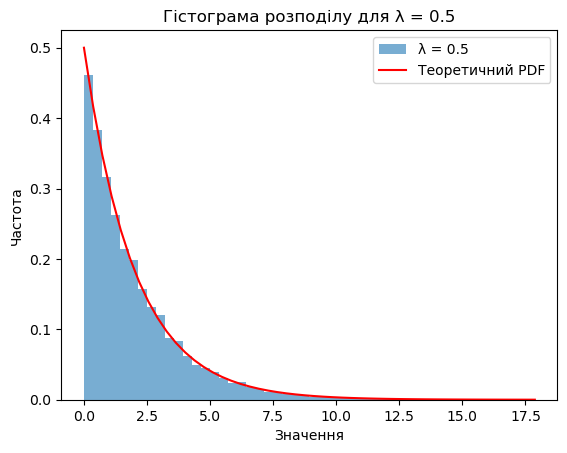

[0.48355505 0.58141955 0.44915004 ... 0.57163521 0.07019762 0.60845123]
Для λ = 1.0:
Середнє: 0.9922247695752698
Дисперсія: 0.9697885009490177
Статистика Chi-squared: 0.06601324473153096
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


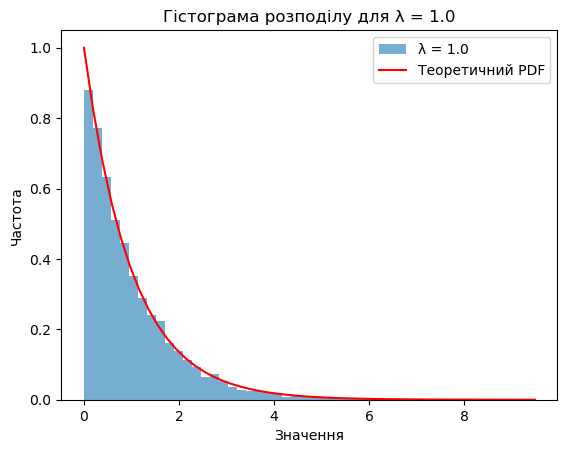

[0.47411733 0.69950252 0.05836492 ... 0.793981   0.04977682 0.81279737]
Для λ = 1.5:
Середнє: 0.6650074922742917
Дисперсія: 0.44846867598630435
Статистика Chi-squared: 0.08581720256281394
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


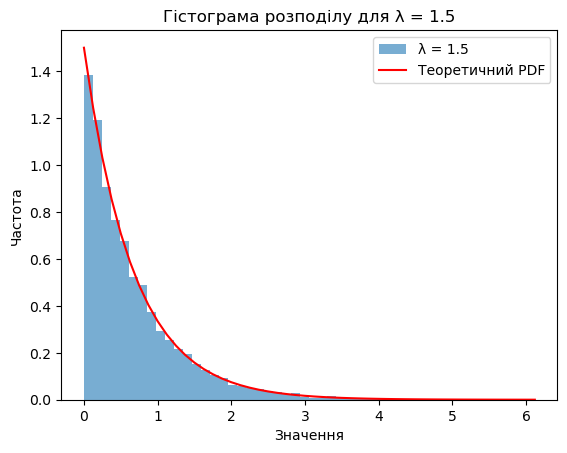

[0.06987182 0.82317661 0.93553352 ... 0.28652521 0.08601847 0.51520161]
Для λ = 2.0:
Середнє: 0.5053381439557624
Дисперсія: 0.25580202879672315
Статистика Chi-squared: 0.11936840110472463
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


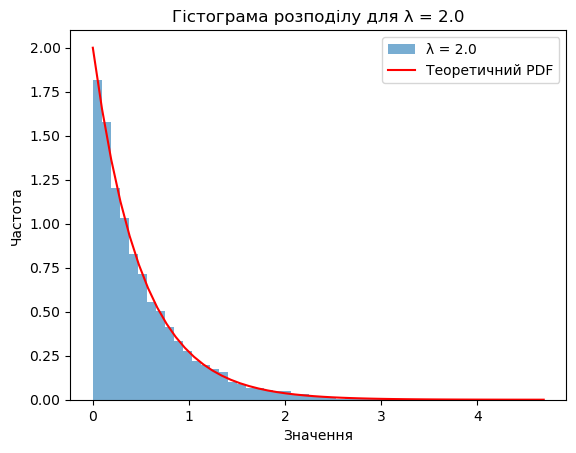

[0.00113923 0.0362497  0.57617947 ... 0.94341629 0.73614734 0.62725818]
Для λ = 2.5:
Середнє: 0.39626872497292737
Дисперсія: 0.15178090461683647
Статистика Chi-squared: 0.12311634448549247
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


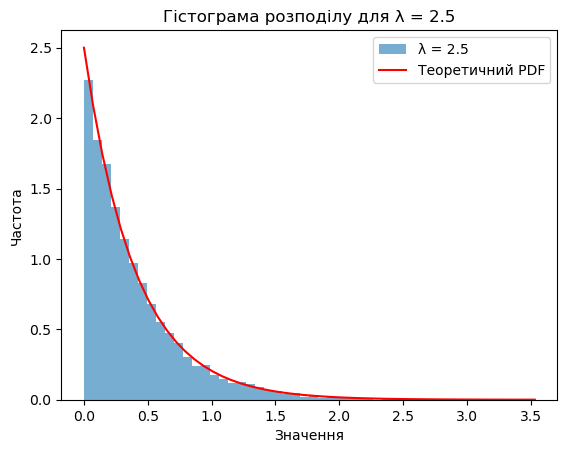

In [16]:
for lam in lambda_values:
    # Генерація випадкових чисел Xi(i) з рівномірним розподілом на інтервалі (0, 1)
    random_numbers = np.random.rand(num_samples)
    print(random_numbers)

    # Застосування формули для отримання випадкових чисел з експоненційним розподілом
    random_exp_numbers = - (1 / lam) * np.log(random_numbers)

    # Побудова гістограми
    plt.hist(random_exp_numbers, bins=num_bins, density=True, alpha=0.6, label=f'λ = {lam}')

    # Теоретичний розподіл експоненційного закону
    x_max = np.max(random_exp_numbers)
    x = np.linspace(0, x_max, 50)
    theoretical_pdf = expon.pdf(x, scale=1/lam)
    plt.plot(x, theoretical_pdf, 'r-', label='Теоретичний PDF')

    # Знаходження середнього і дисперсії
    mean = np.mean(random_exp_numbers)
    variance = np.var(random_exp_numbers)

    chi_squared_statistic, chi_squared_critical = chi_squared_test(random_exp_numbers, num_bins, alpha, lam, x_max)

    print(f'Для λ = {lam}:')
    print(f'Середнє: {mean}')
    print(f'Дисперсія: {variance}')
    print(f'Статистика Chi-squared: {chi_squared_statistic}')
    print(f'Критичне значення Chi-squared: {chi_squared_critical}')
        
    # Порівняння результатів тесту з критичним значенням
    if chi_squared_statistic <= chi_squared_critical:
        print('Нульову гіпотезу не відхиляємо (розподіл відповідає)')
    else:
        print('Нульову гіпотезу відхиляємо (розподіл не відповідає)')
        
    print('---')

    plt.legend()
    plt.title(f'Гістограма розподілу для λ = {lam}')
    plt.xlabel('Значення')
    plt.ylabel('Частота')
    plt.show()